# Crew AI

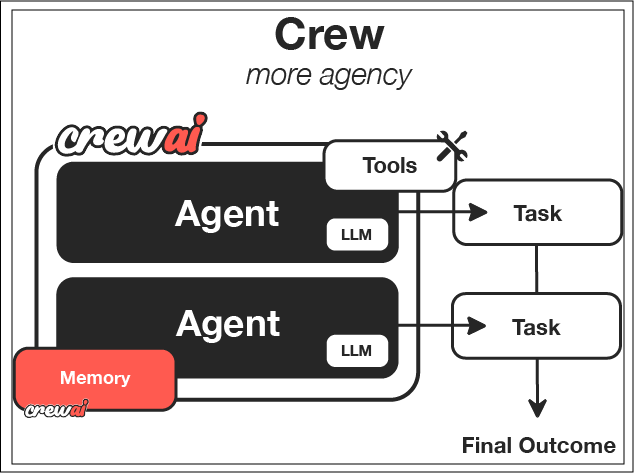

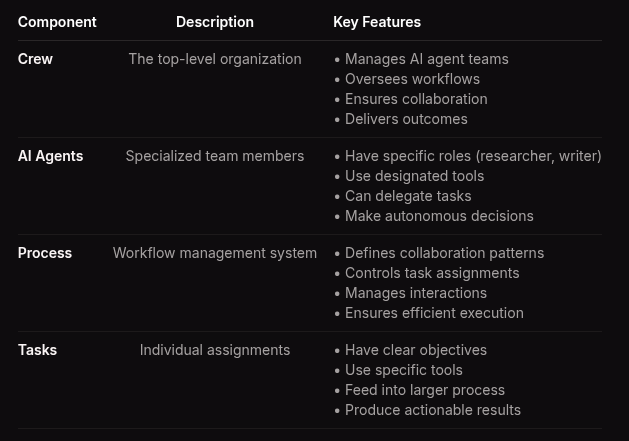

## Installation

In [2]:
!ping https://localhost:11434

ping: https://localhost:11434: Name or service not known


In [1]:
#!pip install -U langchain-ollama crewai

## Importing Packages

In [3]:
from crewai import Agent, Task, Crew, LLM

## Loading Llama3.2 from Ollama

In [4]:
crew_llm = LLM(
    model="ollama/llama3.2",
    base_url="http://localhost:11434"
)

# Setting Up Agent

## Planner Agent

In [5]:
planner = Agent(
    role="Content Planner",
    goal="Plan engaging and factually accurate content on {topic}",
    backstory="You're working on planning a blog article "
              "about the topic: {topic} in 'https://medium.com/'."
              "You collect information that helps the "
              "audience learn something "
              "and make informed decisions. "
              "You have to prepare a detailed "
              "outline and the relevant topics and sub-topics that has to be a part of the"
              "blogpost."
              "Your work is the basis for "
              "the Content Writer to write an article on this topic.",
    llm=crew_llm,
    allow_delegation=False,
 verbose=True
)

## Writer Agent

In [6]:
writer = Agent(
    role="Content Writer",
    goal="Write insightful and factually accurate "
         "opinion piece about the topic: {topic}",
    backstory="You're working on a writing "
              "a new opinion piece about the topic: {topic} in 'https://medium.com/'. "
              "You base your writing on the work of "
              "the Content Planner, who provides an outline "
              "and relevant context about the topic. "
              "You follow the main objectives and "
              "direction of the outline, "
              "as provide by the Content Planner. "
              "You also provide objective and impartial insights "
              "and back them up with information "
              "provide by the Content Planner. "
              "You acknowledge in your opinion piece "
              "when your statements are opinions "
              "as opposed to objective statements.",
    allow_delegation=False,
    llm=crew_llm,
    verbose=True
)

## Editor Agent

In [7]:
editor = Agent(
    role="Editor",
    goal="Edit a given blog post to align with "
         "the writing style of the organization 'https://medium.com/'. ",
    backstory="You are an editor who receives a blog post "
              "from the Content Writer. "
              "Your goal is to review the blog post "
              "to ensure that it follows journalistic best practices,"
              "provides balanced viewpoints "
              "when providing opinions or assertions, "
              "and also avoids major controversial topics "
              "or opinions when possible.",
    llm=crew_llm,
    allow_delegation=False,
    verbose=True
)

## Planner agent's task definition

In [8]:
plan = Task(
    description=(
        "1. Prioritize the latest trends, key players, "
            "and noteworthy news on {topic}.\n"
        "2. Identify the target audience, considering "
            "their interests and pain points.\n"
        "3. Develop a detailed content outline including "
            "an introduction, key points, and a call to action.\n"
        "4. Include SEO keywords and relevant data or sources."
    ),
    expected_output="A comprehensive content plan document "
        "with an outline, audience analysis, "
        "SEO keywords, and resources.",
    agent=planner,
)

## Writer agent's task definition

In [9]:
write = Task(
    description=(
        "1. Use the content plan to craft a compelling "
            "blog post on {topic}.\n"
        "2. Incorporate SEO keywords naturally.\n"
        "3. Sections/Subtitles are properly named "
            "in an engaging manner.\n"
        "4. Ensure the post is structured with an "
            "engaging introduction, insightful body, "
            "and a summarizing conclusion.\n"
        "5. Proofread for grammatical errors and "
            "alignment with the brand's voice.\n"
    ),
    expected_output="A well-written blog post "
        "in markdown format, ready for publication, "
        "each section should have 2 or 3 paragraphs.",
    agent=writer,
)

## Editor Agent's task definition

In [10]:
edit = Task(
    description=("Proofread the given blog post for "
                 "grammatical errors and "
                 "alignment with the brand's voice."),
    expected_output="A well-written blog post in markdown format, "
                    "ready for publication, "
                    "each section should have 2 or 3 paragraphs.",
    agent=editor
)

## Combining all the agents and tasks using Crew

In [ ]:
crew = Crew(
    agents=[planner, writer, editor],
    tasks=[plan, write, edit],
    verbose=False,
)

## Testing the Crew's Multi-Agent

In [13]:
inputs = {"topic":"Comparative study of LangGraph, Autogen and Crewai for building multi-agent system."}
result = crew.kickoff(inputs=inputs)

# Agent: Content Planner
## Task: 1. Prioritize the latest trends, key players, and noteworthy news on Comparative study of LangGraph, Autogen and Crewai for building multi-agent system..
2. Identify the target audience, considering their interests and pain points.
3. Develop a detailed content outline including an introduction, key points, and a call to action.
4. Include SEO keywords and relevant data or sources.


# Agent: Content Planner
## Final Answer: 
Comprehensive Content Plan Document for Comparative Study of LangGraph, Autogen, and Crewai for Building Multi-Agent System

**I. Introduction**

* Title: "Building Multi-Agent Systems with LangGraph, Autogen, and Crewai: A Comparative Study"
* Subtitle: "Exploring the Latest Trends and Technologies in Multi-Agent System Development"
* Description: This article aims to provide an in-depth comparison of three popular platforms for building multi-agent systems: LangGraph, Autogen, and Crewai. We will discuss their features, advantag

In [ ]:
result.dict()['tasks_output']